# Verifica 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1/data/breast-cancer-wisconsin.data')
#nomi delle colonne inseriti manualmente, alternativa:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1/data/breast-cancer-wisconsin.data', names:[...,...,...])

In [ ]:
df

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# 2.1

In [ ]:
df = df.drop('Sample_code_number', axis=1)
df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


## 2.2

In [ ]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace('?', 0)

In [ ]:
df = df.astype(int)

In [ ]:
df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [ ]:
print(df.groupby('Class').size())

Class
2    458
4    241
dtype: int64


In [ ]:
import numpy as np
df_np = df.to_numpy()
x=df_np[:,:-1]
y=df_np[:,-1]

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]
 [ 8 10 10  8  7 10  9  7  1]
 [ 1  1  1  1  2 10  3  1  1]
 [ 2  1  2  1  2  1  3  1  1]
 [ 2  1  1  1  2  1  1  1  5]
 [ 4  2  1  1  2  1  2  1  1]]
y = [2 2 2 2 2 4 2 2 2 2]


In [ ]:
import collections
collections.Counter(y)

Counter({2: 458, 4: 241})

## 2.3 KNN

In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability
              
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((489, 9), (489,), (210, 9), (210,))

In [ ]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[ 1  1  1  1  1  0  1  1  1]
 [ 4  2  4  3  2  2  2  1  1]
 [ 3  3  1  1  2  1  1  1  1]
 [10  5  6 10  6 10  7  7 10]
 [ 2  1  1  1  2  1  3  1  1]
 [ 5  1  1  3  2  1  1  1  1]
 [ 5  1  3  1  2  1  1  1  1]
 [ 8  4  4  1  6 10  2  5  2]
 [ 5  1  1  3  2  1  1  1  1]
 [ 5  3  6  1  2  1  1  1  1]]
y_train = [2 2 2 4 2 2 2 4 2 2]


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)

predict_knn = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict_knn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [2 2 4 2 2 4 2 2 2 2]
dati reali presenti nel dataset di test = [2 2 4 2 2 4 4 2 2 2]


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


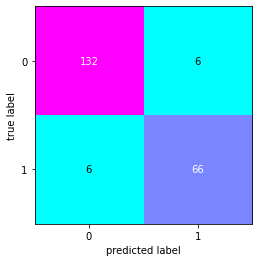

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.cool)
plt.show()

In [ ]:
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       138
           4       0.92      0.92      0.92        72

    accuracy                           0.94       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



Maximum accuracy:- 0.9476190476190476 at K = 7


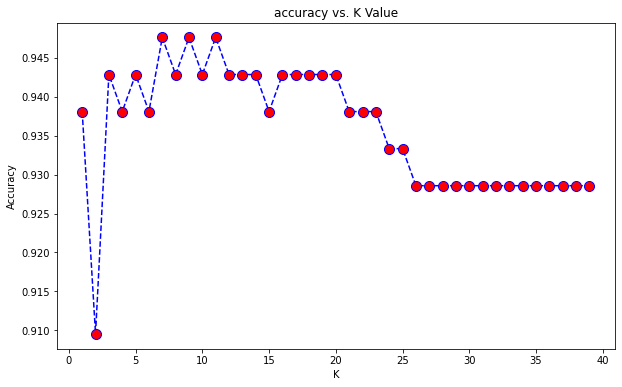

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for k in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=7)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict_knn = neigh.predict(X_test)

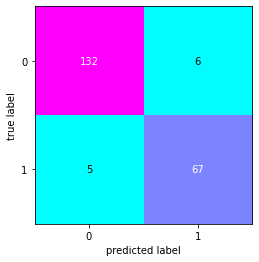

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.cool)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       138
           4       0.92      0.93      0.92        72

    accuracy                           0.95       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



## 2.4

In [ ]:
daScoprire = [[10,10,10,10,5,10,10,10,7]]
predictdS = neigh.predict(daScoprire)
predictdS

array([4])

## 2.5 Decision Tree

I valori influenti sono 4:
- la profondità massima dell'albero
- le dimensioni minime di un sottogruppo
- il numero massimo delle "foglie"
- il numero minimo delle "foglie"

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [2 2 4 4 2 4 4 2 2 2]
dati reali presenti nel dataset di test = [2 2 4 2 2 4 4 2 2 2]


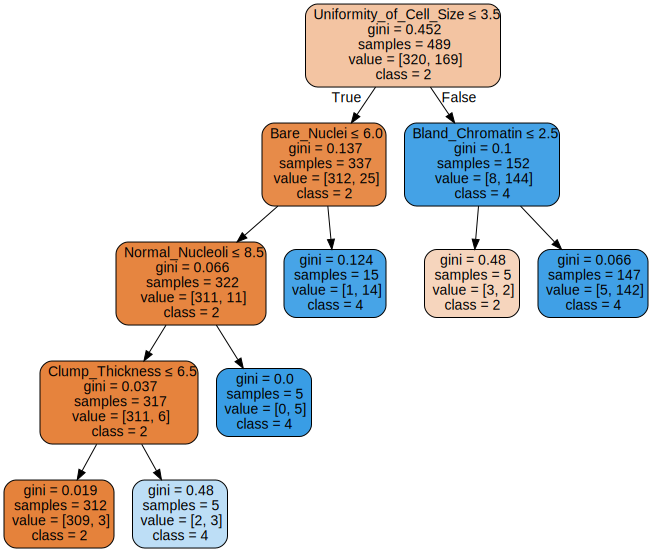

In [ ]:
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[:-1],  
                     class_names=['2', '4'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Breast Cancer')
graph

In [ ]:
from sklearn.tree import export_text
r = export_text(tree_clf, feature_names=features[0:-1])
print(r)

|--- Uniformity_of_Cell_Size <= 3.50
|   |--- Bare_Nuclei <= 6.00
|   |   |--- Normal_Nucleoli <= 8.50
|   |   |   |--- Clump_Thickness <= 6.50
|   |   |   |   |--- class: 2
|   |   |   |--- Clump_Thickness >  6.50
|   |   |   |   |--- class: 4
|   |   |--- Normal_Nucleoli >  8.50
|   |   |   |--- class: 4
|   |--- Bare_Nuclei >  6.00
|   |   |--- class: 4
|--- Uniformity_of_Cell_Size >  3.50
|   |--- Bland_Chromatin <= 2.50
|   |   |--- class: 2
|   |--- Bland_Chromatin >  2.50
|   |   |--- class: 4



Maximum accuracy:- 0.9333333333333333 at K = 4


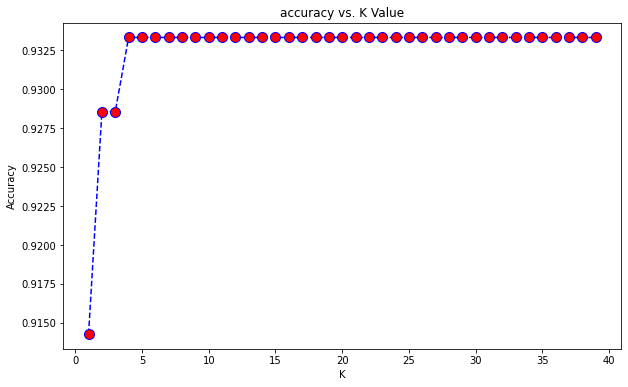

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
  tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=i, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
  # prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
  tree_clf.fit(X_train,y_train)

  # seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
  predict_dt = tree_clf.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, predict_dt))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

Come specificato dal grafico, tutti i K superiori o uguali a 4 offrono la stesssa precisione, indicata come massima dal accuracy calculator. 

In [ ]:
# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=5, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [2 2 4 4 2 4 4 2 2 2]
dati reali presenti nel dataset di test = [2 2 4 2 2 4 4 2 2 2]


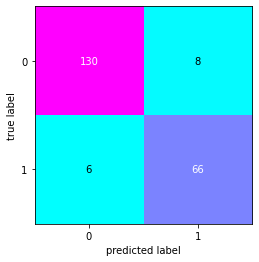

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.cool)
plt.show() # DecisionTree

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           2       0.96      0.94      0.95       138
           4       0.89      0.92      0.90        72

    accuracy                           0.93       210
   macro avg       0.92      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210



## 2.6

In [ ]:
daScoprire = [[10,10,10,10,5,10,10,10,7]]
predictdS = tree_clf.predict(daScoprire)
predictdS

array([4])

## 2.7 

**In questo caso il miglior metodono è il KNN**
    
    KNN
               precision    recall  f1-score   support

           2       0.96      0.96      0.96       138
           4       0.92      0.93      0.92        72

    accuracy                           0.95       210
    macro avg       0.94      0.94      0.94       210
    weighted avg       0.95      0.95      0.95       210   


    Decision Tree
              precision    recall  f1-score   support

           2       0.96      0.94      0.95       138
           4       0.89      0.92      0.90        72

    accuracy                           0.93       210
    macro avg       0.92      0.93      0.93       210
    weighted avg       0.93      0.93      0.93       210

## 2.8

In [ ]:
df.loc[(df['Clump_Thickness'] == 10) & (df['Uniformity_of_Cell_Size'] == 10) & (df['Uniformity_of_Cell_Shape'] == 10) & (df['Marginal_Adhesion'] == 10) & (df['Single_Epithelial_Cell_Size'] == 5) & (df['Bare_Nuclei'] == 10) & (df['Bland_Chromatin'] == 10) & (df['Normal_Nucleoli'] == 10) & (df['Mitoses'] == 7)] 


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
680,10,10,10,10,5,10,10,10,7,4


I metodi hanno lavorato correttamente

*  KNN predict: 4
*  Tree predict: 4
*  True Value: 4 


In [ ]:
dfX= pd.DataFrame(X_test, columns=['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'])

In [ ]:
dfX

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1,1,1,1,2,2,1,1,1
1,2,1,1,1,2,1,1,1,1
2,8,10,10,8,7,10,9,7,1
3,7,1,2,3,2,1,2,1,1
4,1,2,2,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...
205,1,1,3,1,2,1,2,1,1
206,10,5,5,6,8,8,7,1,1
207,3,1,1,1,2,1,2,1,1
208,5,1,1,1,1,1,1,1,1


In [ ]:
dfX.loc[(dfX['Clump_Thickness'] == 10) & (dfX['Uniformity_of_Cell_Size'] == 10) & (dfX['Uniformity_of_Cell_Shape'] == 10) & (dfX['Marginal_Adhesion'] == 10) & (dfX['Single_Epithelial_Cell_Size'] == 5) & (dfX['Bare_Nuclei'] == 10) & (dfX['Bland_Chromatin'] == 10) & (dfX['Normal_Nucleoli'] == 10) & (dfX['Mitoses'] == 7)] 

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
198,10,10,10,10,5,10,10,10,7


La persona era stata inserita nelle X_test

## Random Forest

In [ ]:
df['Class'] = df['Class'].map({2:0, 4:1})

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9857142857142858


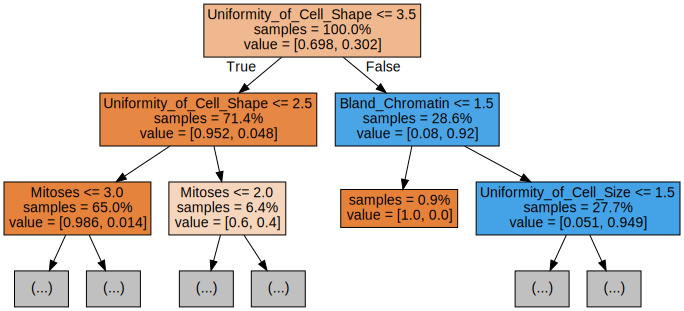

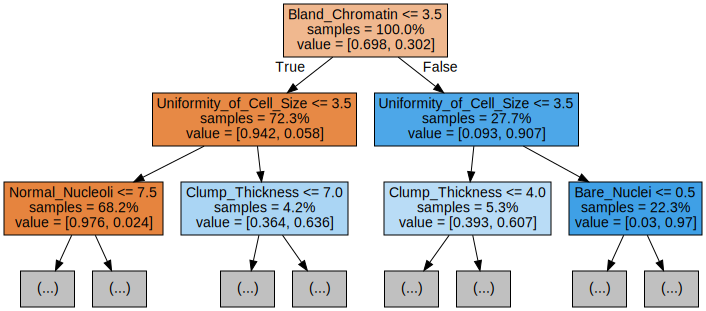

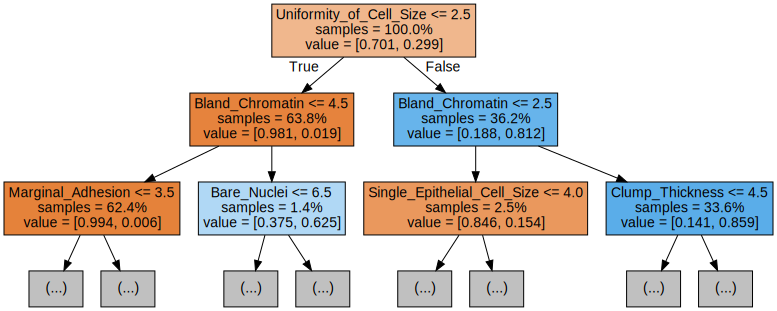

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

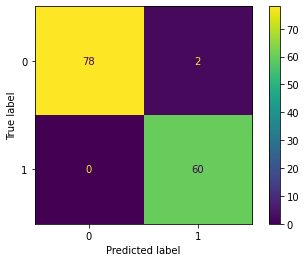

In [ ]:


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Verifica 2

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/glass.data',names=['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass'])
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
print(df.groupby('Type of Glass').size())

Type of Glass
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


In [ ]:
df = df.drop(columns=['ID'])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df['Type of Glass'] = df['Type of Glass'].replace(5,4)
df['Type of Glass'] = df['Type of Glass'].replace(6,5)
df['Type of Glass'] = df['Type of Glass'].replace(7,6)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,6
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,6
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,6
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=3e945522d43047220a1429062465a1d06b42a70348e23f4f7017429d75202afb
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


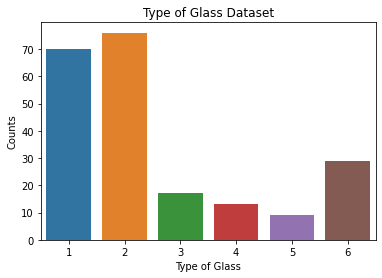

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
!pip install sklearn
import numpy as np
sns.countplot(x="Type of Glass", data=df)
plt.title("Type of Glass Dataset")
plt.xlabel("Type of Glass")
plt.ylabel("Counts")
plt.show()

In [ ]:
df_np = df.to_numpy()
x=df_np[:,:-1]
y=df_np[:,-1]


In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]
 [1.51596e+00 1.27900e+01 3.61000e+00 1.62000e+00 7.29700e+01 6.40000e-01
  8.07000e+00 0.00000e+00 2.60000e-01]
 [1.51743e+00 1.33000e+01 3.60000e+00 1.14000e+00 7.30900e+01 5.80000e-01
  8.17000e+00 0.00000e+00 0.00000e+00]
 [1.51756e+00 1.31500e+01 3.61000e+00 1.05000e+00 7.32400e+01 5.70000e-01
  8.24000e+00 0.00000e+00 0.00000e+00]
 [1.51918e+00 1.40400e+01 3.58000e+00 1.37000e+00 7.20800e+01 5.60000e-01
  8.30000e+00 0.00000e

In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

Maximum accuracy:- 0.7846153846153846 at K = 3


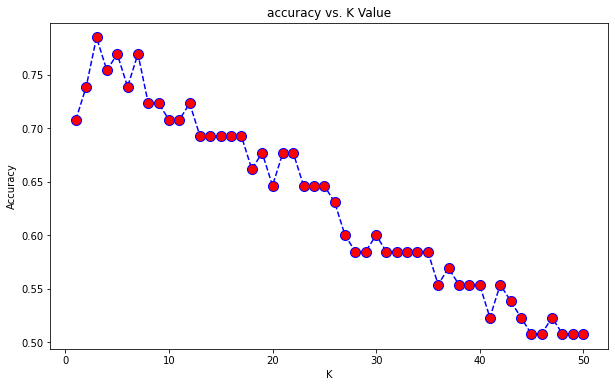

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for k in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,51),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo con n_neighbors=3
neigh = KNeighborsClassifier(n_neighbors=3)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict_knn = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict_knn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [4. 4. 2. 1. 2. 1. 6. 2. 1. 1.]
dati reali presenti nel dataset di test = [4. 2. 2. 1. 5. 1. 6. 2. 1. 1.]


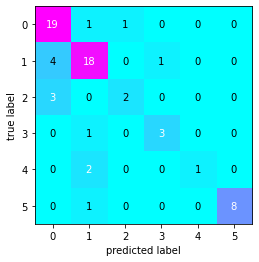

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.cool)
plt.show()

In [ ]:
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

         1.0       0.73      0.90      0.81        21
         2.0       0.78      0.78      0.78        23
         3.0       0.67      0.40      0.50         5
         4.0       0.75      0.75      0.75         4
         5.0       1.00      0.33      0.50         3
         6.0       1.00      0.89      0.94         9

    accuracy                           0.78        65
   macro avg       0.82      0.68      0.71        65
weighted avg       0.80      0.78      0.78        65



In [ ]:
from tabulate import tabulate

info = ['RI', 'NA', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
daScoprire = [1.51115, 17.38,0.00,0.34,75.41,0.00, 6.65, 0.00, 0.00] 
print(tabulate([daScoprire], headers=info))

     RI     NA    Mg    Al     Si    K    Ca    Ba    Fe
-------  -----  ----  ----  -----  ---  ----  ----  ----
1.51115  17.38     0  0.34  75.41    0  6.65     0     0


In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [4. 2. 2. 1. 5. 1. 6. 2. 2. 1.]
dati reali presenti nel dataset di test = [4. 2. 2. 1. 5. 1. 6. 2. 1. 1.]


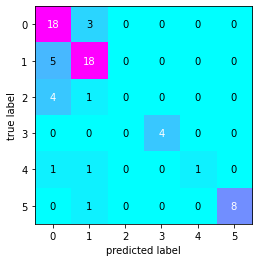

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.cool)
plt.show() # DecisionTree

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

         1.0       0.64      0.86      0.73        21
         2.0       0.75      0.78      0.77        23
         3.0       0.00      0.00      0.00         5
         4.0       1.00      1.00      1.00         4
         5.0       1.00      0.33      0.50         3
         6.0       1.00      0.89      0.94         9

    accuracy                           0.75        65
   macro avg       0.73      0.64      0.66        65
weighted avg       0.72      0.75      0.72        65



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('K-NN')
print(classification_report(y_test, predict_knn))

print('Decision Tree')
print(classification_report(y_test, predict_dt))

K-NN
              precision    recall  f1-score   support

         1.0       0.73      0.90      0.81        21
         2.0       0.78      0.78      0.78        23
         3.0       0.67      0.40      0.50         5
         4.0       0.75      0.75      0.75         4
         5.0       1.00      0.33      0.50         3
         6.0       1.00      0.89      0.94         9

    accuracy                           0.78        65
   macro avg       0.82      0.68      0.71        65
weighted avg       0.80      0.78      0.78        65

Decision Tree
              precision    recall  f1-score   support

         1.0       0.64      0.86      0.73        21
         2.0       0.75      0.78      0.77        23
         3.0       0.00      0.00      0.00         5
         4.0       1.00      1.00      1.00         4
         5.0       1.00      0.33      0.50         3
         6.0       1.00      0.89      0.94         9

    accuracy                           0.75        65
   m

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [ ]:
X = df.drop('Type of Glass', axis=1)
y = df['Type of Glass']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7441860465116279


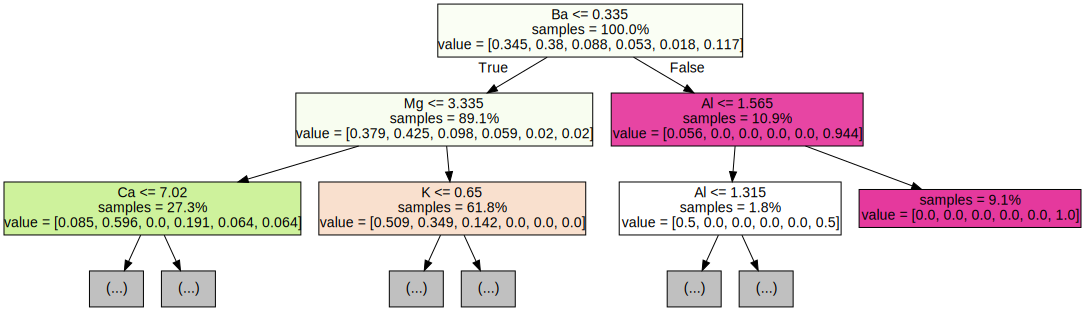

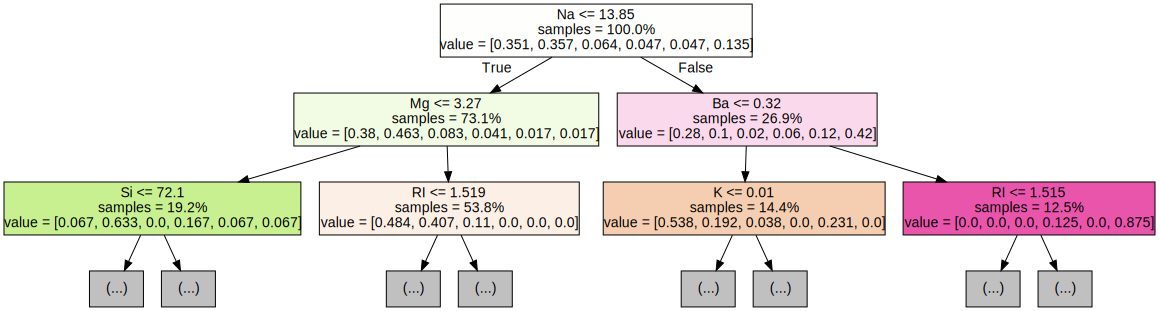

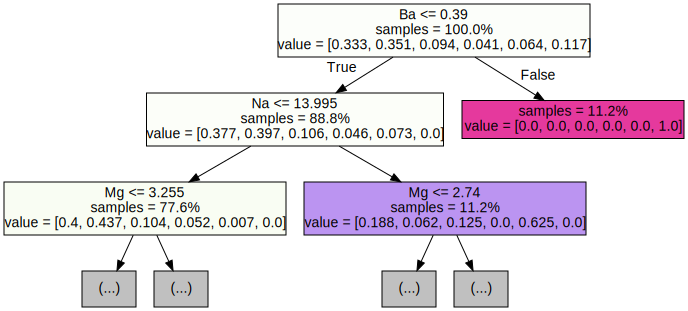

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

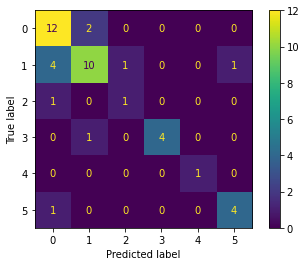

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Verifica 3

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1/data/accent-mfcc-data-1.csv')
df

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
df["language"].replace({"ES": 0, "FR": 1, "GE" : 2, "IT" : 3, "UK": 4, "US" : 5}, inplace = True)

df = df.dropna().reset_index(drop=True)
df = df.astype(int)

df

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,0,7,-6,7,11,-7,12,-11,3,1,-2,0,-5
1,0,10,-5,3,11,-7,12,-12,3,0,-4,2,-6
2,0,7,-5,7,9,-7,11,-13,4,-1,-7,0,-6
3,0,6,-5,6,9,-6,11,-12,6,0,-6,1,-6
4,0,5,-5,7,8,-6,12,-12,4,0,-3,2,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,5,0,-3,3,1,3,5,-7,9,-11,7,0,-1
325,5,-2,-1,1,0,2,7,-6,10,-11,6,2,0
326,5,2,-4,5,3,2,3,-4,11,-12,7,0,-2
327,5,0,0,3,2,3,6,-5,12,-11,4,1,-2


In [ ]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,1:]
y=dfnp[:,0]

import collections
collections.Counter(y)

Counter({0: 29, 1: 30, 2: 30, 3: 30, 4: 45, 5: 165})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30,
                                                    stratify = y,
                                                    random_state = 123)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((230, 12), (230,), (99, 12), (99,))

In [ ]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[  7  -7   9   9  -8  12 -13   3  -1  -5   2  -5]
 [  5   1   1  11  -9   7  -8   2   0  -3   0  -2]
 [ -1   0   1   7  -8   8 -10   5   0  -3   0   0]
 [  2  -2   2   4  -6  10 -12   6   0  -4   4  -5]
 [  8  -3   0   9  -6  10  -9   8   0  -9   3  -4]
 [  1   0   3   0   6   1  -6  10  -5   5  -6   0]
 [  1  -7   4   2   1   4  -8  13  -8   6   0  -2]
 [  1  -3   2   6  -5  11  -9   6   0  -1   4  -5]
 [  2  -1   1   6  -6  11 -10   5   0  -1   4  -3]
 [  5  -3   0   0  -7  11 -12   8   0  -3   5  -5]]
y_train = [0 3 3 2 0 5 5 4 2 2]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)

print(f'dati predetti dal metodo =                {predict[:10]}') 
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') 

dati predetti dal metodo =                [5 1 5 2 1 5 5 3 0 5]
dati reali presenti nel dataset di test = [5 5 5 2 1 5 5 3 0 5]


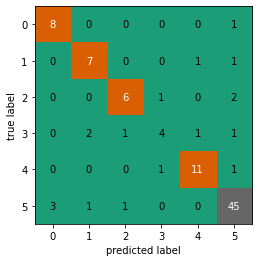

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap = plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.70      0.78      0.74         9
           2       0.75      0.67      0.71         9
           3       0.67      0.44      0.53         9
           4       0.85      0.85      0.85        13
           5       0.88      0.90      0.89        50

    accuracy                           0.82        99
   macro avg       0.76      0.75      0.75        99
weighted avg       0.82      0.82      0.81        99



In [ ]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion="gini",
                                       max_depth=4, 
                                       min_samples_split=30,
                                       max_leaf_nodes=6, 
                                       min_samples_leaf=4 
                                      )

tree_clf.fit(X_train,y_train)

predict_dt = tree_clf.predict(X_test)

print(f'dati predetti dal metodo =                {predict_dt[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [5 1 5 5 5 5 5 5 0 5]
dati reali presenti nel dataset di test = [5 5 5 2 1 5 5 3 0 5]


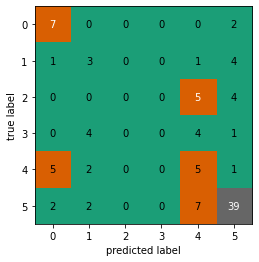

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap = plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           1       0.27      0.33      0.30         9
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         9
           4       0.23      0.38      0.29        13
           5       0.76      0.78      0.77        50

    accuracy                           0.55        99
   macro avg       0.29      0.38      0.32        99
weighted avg       0.48      0.55      0.51        99



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


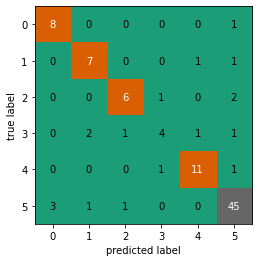

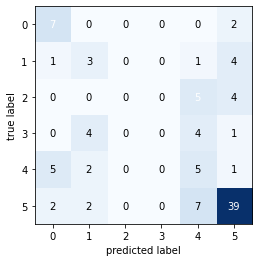

In [ ]:

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2) #KNN
plot_confusion_matrix(confusion_matrix(y_test, predict_dt)) #Decision Tree

plt.show()

In [ ]:
print(classification_report(y_test, predict)) #KNN

print(classification_report(y_test, predict_dt))#Decision Tree

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.70      0.78      0.74         9
           2       0.75      0.67      0.71         9
           3       0.67      0.44      0.53         9
           4       0.85      0.85      0.85        13
           5       0.88      0.90      0.89        50

    accuracy                           0.82        99
   macro avg       0.76      0.75      0.75        99
weighted avg       0.82      0.82      0.81        99

              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           1       0.27      0.33      0.30         9
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         9
           4       0.23      0.38      0.29        13
           5       0.76      0.78      0.77        50

    accuracy                           0.55        99
   macro avg       0.29

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [ ]:
X = df.drop('language', axis=1)
y = df['language']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.803030303030303


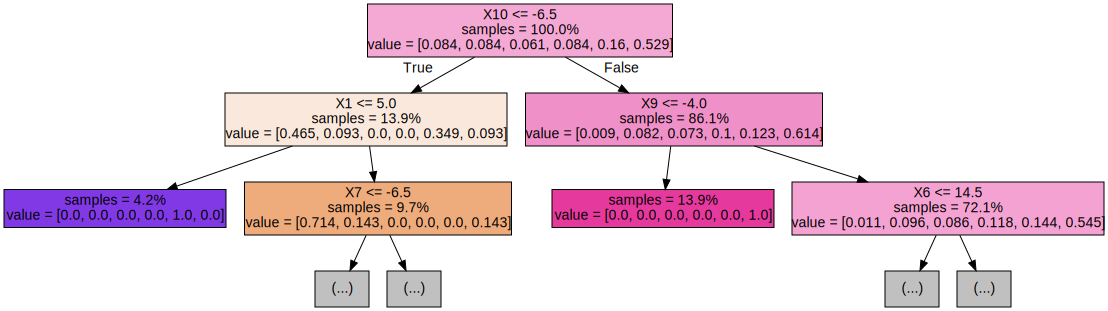

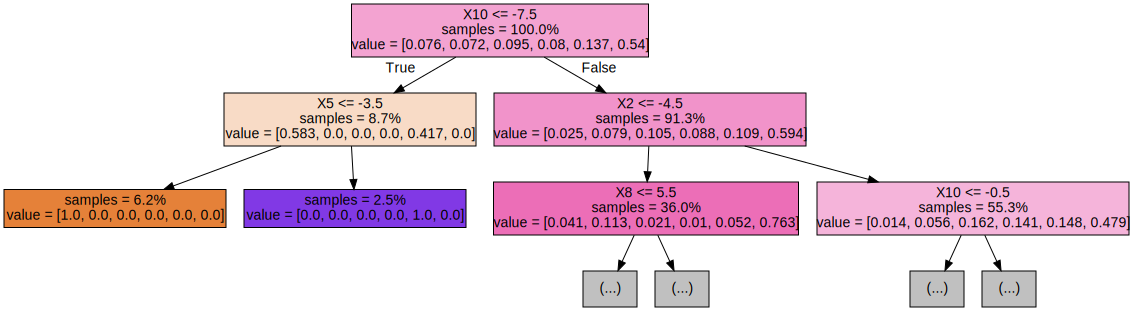

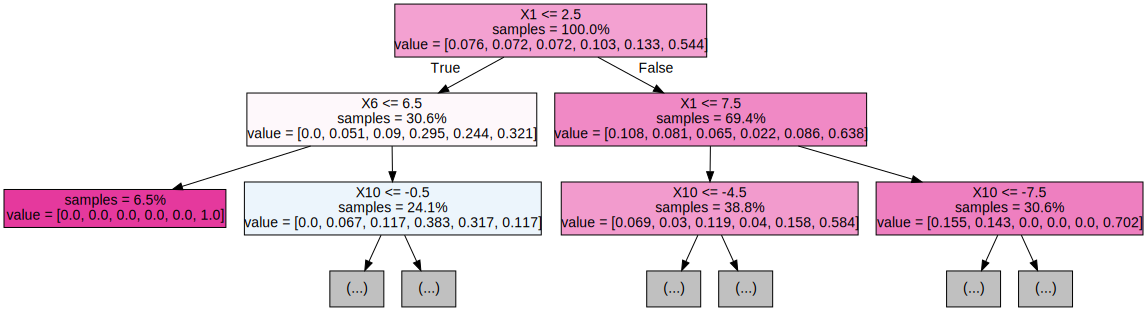

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

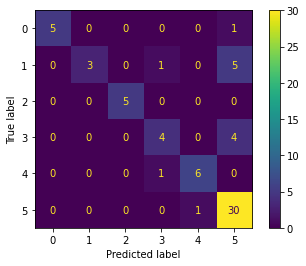

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();